# Prática 4 - Exploração de Dados - Parte 4

#Nome: Ricardo França Fernandes do Vale     No. USP: 9293477

Nesta prática, ocorrerá a exploração de dados denominada pré-processamento, onde serão realizadas técnicas de limpeza dimensional e tratamento de dados faltantes. Por conta do propósito desta aplicação de técnicas, o dataset a ser utilizado para a prática será apenas o dataset com maior quantidade de dados. Ao fim do pré-processamento, será utilizada uma medida de desempenho para a classificação ser aplicada no dataset, para validar o processamento feito nos dados. 


## Dataset - Agro (Falhas em plantio)

Primeiramente, será carregado o dataset:

In [165]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

agro = pd.read_csv(
        './falhas_plantio_hashing.csv', 
        sep=';', header=0, encoding='latin1')
agro.head()

,Unnamed: 0,Fazenda,Zona,Talhao,Nome_Estacao_SM1,INSTANCIA1,CD_EMPRESA1,Tipo_prop1,CD_SAFRA,Area_Plantio,...,EPT_mm_December,EPT_mm_February,EPT_mm_January,EPT_mm_July,EPT_mm_June,EPT_mm_March,EPT_mm_May,EPT_mm_November,EPT_mm_October,EPT_mm_September
0,1,8065492367f538812f3928137e492c36,dd4ad37ee474732a009111e3456e7ed7,71db8a6cad03244e6e50f0ad8bc95a65,9d808d5988da444614e97bb46dfcc388,4770fa66c5954411ff928125d447259b,c7f66da1cae4f223b9bae717f05900f7,c7f66da1cae4f223b9bae717f05900f7,21617,24.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,8065492367f538812f3928137e492c36,dd4ad37ee474732a009111e3456e7ed7,8f3571abef23f6aca0f7b8666a74e7e0,9d808d5988da444614e97bb46dfcc388,4770fa66c5954411ff928125d447259b,c7f66da1cae4f223b9bae717f05900f7,c7f66da1cae4f223b9bae717f05900f7,21617,13.59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,8065492367f538812f3928137e492c36,dd4ad37ee474732a009111e3456e7ed7,fa5a4df7ac0f9782037da890557fd8b8,9d808d5988da444614e97bb46dfcc388,4770fa66c5954411ff928125d447259b,c7f66da1cae4f223b9bae717f05900f7,c7f66da1cae4f223b9bae717f05900f7,21617,11.34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,f648ef67be4ec669a2cf9f44a14ad6f4,3a289991381335a0fc94ad80f79fe88e,4b5630ee914e848e8d07221556b0a2fb,bb4b9c9cb3eb0376a9c896805d07adcb,8fdf2b1125e197b694ab48c195f7743f,40755f30599581bfb1186f077db8f580,c01f179e4b57ab8bd9de309e6d576c48,21617,23.16,...,157.8,128.95,134.18,99.63,75.31,139.11,83.1,152.3,151.4,130.1
4,5,f648ef67be4ec669a2cf9f44a14ad6f4,3a289991381335a0fc94ad80f79fe88e,c01f179e4b57ab8bd9de309e6d576c48,bb4b9c9cb3eb0376a9c896805d07adcb,8fdf2b1125e197b694ab48c195f7743f,40755f30599581bfb1186f077db8f580,c01f179e4b57ab8bd9de309e6d576c48,21617,7.36,...,157.8,128.95,134.18,99.63,75.31,139.11,83.1,152.3,151.4,130.1


### 0. Reescolha dos atributos

Conforme visto na prática passada, os atributos escolhidos não apresentavam boa correlação linear, além de 3/5 deles possuírem distribuição de dados com obliquidade positiva. Por isso, após algumas questões de pré-processamento, serão refeitas algumas análises após a reescolha dos atributos:

* Verificação de histograma
* Exibição da correlação entre os atributos (Heat Map)

### 1. Amostras com problemas

O dataset será, primeiramente, analisado diante de seus dados com problemas. Como a análise é feita com dados numéricos, temos duas abordagens:

* Eliminar dados faltantes: seja preenchendo esses dados ou removendo registros com essa característica;
* Verificar outliers que podem ter sido obtidos com erro, por representarem dados fora do intervalo esperado ou demonstrarem erro de digitação.

A primeira abordagem será seguida primeiramente; dependendo dos resultados, a segunda análise pode não ser feita. O primeiro passo é observar a proporção de colunas faltantes. Para isso ocorrer, inicia-se observando a proporção de dados faltantes por atributo, ordenada de forma ascendente, para exibir primeiro os atributos com menos dados faltantes.

In [166]:
na_proportion_map = ((agro.isna().sum() / len(agro)).sort_values()).head(n=40)
na_proportion_map

Unnamed: 0          0.000000
Ciclo               0.000000
Perc_Infest_Inv     0.000000
CD_SAFRA            0.000000
Tipo_prop1          0.000000
CD_EMPRESA1         0.000000
Area_Plantio        0.000000
Nome_Estacao_SM1    0.000000
Talhao              0.000000
Zona                0.000000
Fazenda             0.000000
INSTANCIA1          0.000000
FERT_KG             0.002222
INSET_KG            0.002222
HERB_L              0.002222
HERB_KG             0.002222
FUNG_L              0.002222
FERT_T              0.002222
FERT_L              0.002222
ESPAL_L             0.002222
ADEF_T              0.002222
CORR_KG             0.002222
BIOL_KG             0.002222
BIOL_Co             0.002222
ADVE_KG             0.002222
INSET_L             0.002222
ADEF_PC             0.002222
ADEF_KG             0.002222
CORR_T              0.002222
MATU_KG             0.002222
MATU_L              0.002222
MUDA_PC             0.002222
RESI_M3             0.002222
RESI_T              0.002222
Perc_Falha    

Como é observado acima, os dados não faltantes geralmente estão atribuídos a algum tipo de rótulo ou são valores categóricos, para isso, diante dessa lista de atributos com a proporção de valores faltantes atribuídos a si serão utilizados para estudo posterior apenas os atributos numéricos.

### Diante da problemática da reescolha dos atributos...

Observando os atributos que possuem a menor quantidade de registros faltantes, e também que possuem especificação significativa para gerar hipóteses, são reescolhidos cinco destes atributos para a análise posterior:

* Quantidade (em litros) de maturadores utilizados no plantio;
* Quantidade (em litros) de herbicida utilizado na região;
* Quantidade (em kg) de fertilizantes utilizados na região;
* Quantidade de horas de operação no plantio;
* Percentual de Falha no plantio.

Na configuração atual, a quantidade de dados perdidos no dataset selecionado é calculada abaixo:

In [167]:
MATU_L = pd.Series(agro.MATU_L.apply(pd.to_numeric, errors='coerce'))
HERB_L = pd.Series(agro.HERB_L.apply(pd.to_numeric, errors='coerce'))
INSET_KG = pd.Series(agro.INSET_KG.apply(pd.to_numeric, errors='coerce'))
QT_OPER_Hr = pd.Series(agro.QT_OPER_Hr.apply(pd.to_numeric, errors='coerce'))
percFalha = pd.Series(agro.Perc_Falha.apply(pd.to_numeric, errors='coerce'))

agro_clean = pd.concat([MATU_L,HERB_L,INSET_KG,QT_OPER_Hr,percFalha], keys=['MATU_L','HERB_L','INSET_KG','QT_OPER_Hr','Perc_Falha'], axis=1).copy()
agro_clean.head()

,MATU_L,HERB_L,INSET_KG,QT_OPER_Hr,Perc_Falha
0,0.99,0.99,1.01,3.0,0.0039
1,0.99,1.07,1.01,2.0,0.0016
2,0.99,1.07,1.01,3.0,0.0019
3,1.00,1.00,1.22,3.0,0.0182
4,1.09,0.99,1.09,3.0,0.0214


Primeiramente, para observar se os atributos, em conjunto, não possuem perda de dados muito grande, será refeita a verificação de porcentagem de dados faltantes; porém, será analisada a quantidade de registros que possua qualquer um dos atributos com dados faltantes.

In [168]:
agro_clean1 = agro_clean.dropna().copy()
print('Porcentagem de linhas excluidas devido a dados faltantes: ', end='')
print(str(((1 - (len(agro_clean1)/len(agro)))*100))+'%')

Porcentagem de linhas excluidas devido a dados faltantes: 13.408441764519196%


Diante das unidades experimentais, a abordagem de tratamento de dados faltantes será a exclusão dos registros que os possuem em qualquer um dos atributos. A abordagem de substituir os dados faltantes por estimativas é descartada devido à falta de conhecimento técnico na área da agricultura/botânica, o know-how necessário para inferir nos dados que faltam nos registros individualmente.

Agora, serão feitas as análises de histograma e de correlação desses atributos.

Análise dos histogramas: 


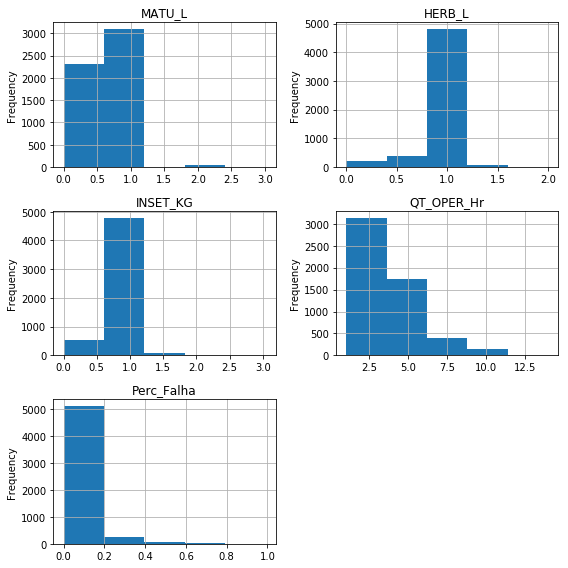




Análise da correlação: 
              MATU_L    HERB_L  INSET_KG  QT_OPER_Hr  Perc_Falha
MATU_L      1.000000 -0.034988  0.266051   -0.291467   -0.158294
HERB_L     -0.034988  1.000000 -0.018203    0.155242    0.017627
INSET_KG    0.266051 -0.018203  1.000000   -0.061266   -0.054546
QT_OPER_Hr -0.291467  0.155242 -0.061266    1.000000    0.076716
Perc_Falha -0.158294  0.017627 -0.054546    0.076716    1.000000


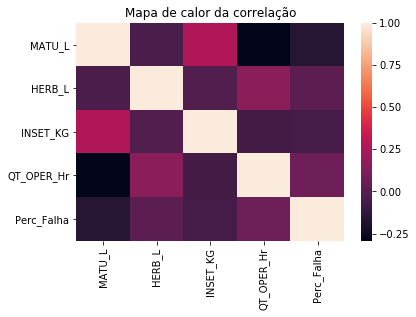

In [169]:
print ('Análise dos histogramas: ')
plt.figure(figsize=(8, 8))
for col in range(1,6):
    ax = plt.subplot(3, 2, col)
    agro_clean1.iloc[:, col-1].plot.hist(bins=5, grid=True)
    ax.set_title(agro_clean1.keys()[col-1])

plt.tight_layout()
plt.show()

print('\n\n')
print('Análise da correlação: ')
correlation = agro_clean1.iloc[:,0:5].corr()
print(correlation)
axis2 = plt.axes()
sns.heatmap(correlation, ax=axis2)
axis2.set_title('Mapa de calor da correlação')

plt.show()

Como é visto nas informações geradas, estes atributos possuem melhores relações para realizar hipóteses de correlação (o número de atributos antissimétricos caiu para 2).

Dessa forma, **estes atributos serão levados adiante para as hipóteses**.

### 2. Tratamento dos dados faltantes

Conforme foi discorrido na análise de dados, há uma possibilidade muito grande de que os dados faltantes terão seus registros removidos devido a falta de conhecimento em Agricultura/Botânica/Geografia para estimativa de valores. Outro motivo para evitar a estimativa para substituir valores faltantes é o fato de que isso pode gerar um fenômeno parecido à reamostragem, devido ao aspecto de "melhorar" os dados para realizar a classificação de dados.

Antes de realizar a limpeza de dados, é necessário observar os outliers dos atributos (através de boxplot) para verificar o porquê de ocorrerem esses dados anômalos. 

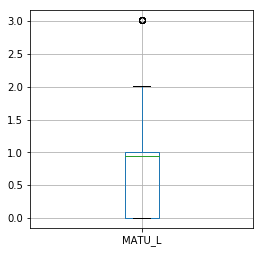

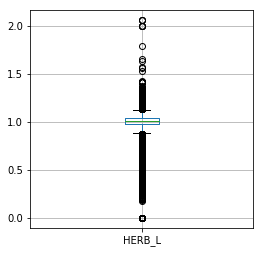

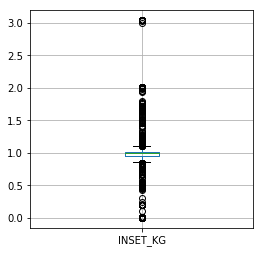

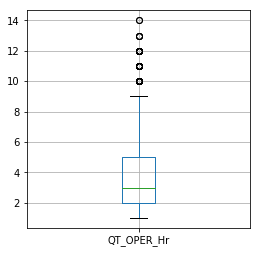

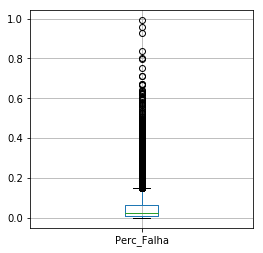

In [170]:
for i in range(len(agro_clean.columns)):
    agro_clean.boxplot(column=agro_clean.columns[[i]].tolist(),figsize=(4,4))
    plt.show()

Como é possível observar, outliers não são dados mal coletados, o que permite reforçar a ideia de que má coleta de dados não pode ter gerado os dados faltantes. Então, a abordagem será observar os registros com dados faltantes.

In [171]:
nan_list=[]
for i in range(len(agro_clean)):
    if(agro_clean.iloc[i,:].isna().sum() != 0):
        nan_list.append(agro_clean.iloc[i,:])

print(pd.DataFrame(nan_list).head(n=len(nan_list)))

      MATU_L  HERB_L  INSET_KG  QT_OPER_Hr  Perc_Falha
89      1.05    1.00      1.05         NaN      0.1107
90      1.05    1.00      1.05         NaN      0.1148
95      1.05    1.11      1.05         NaN      0.0136
99      1.05    1.02      1.05         NaN      0.0240
103     1.05    1.03      1.05         NaN      0.0435
104     1.05    1.00      1.05         NaN      0.0167
110     1.05    1.16      1.05         NaN      0.0278
111     1.05    1.12      1.05         NaN      0.0613
244     1.08    0.96      1.08         1.0         NaN
245     0.00    0.96      0.00         2.0         NaN
288     1.00    1.10      1.00         1.0         NaN
306     0.96    0.90      0.94         3.0         NaN
307     0.96    0.90      0.94         2.0         NaN
320     0.96    0.90      0.94         2.0         NaN
321     0.96    0.90      0.94         2.0         NaN
327     0.96    0.90      0.94         3.0         NaN
335     0.90    0.97      0.98         3.0         NaN
344     0.

Analisando os dados, pode-se inferir que os dados faltantes estão ocorrendo por uma causa **aleatória**, já que os registros demonstram ter dados faltantes por uma simples questão de falta de coleta.

### 3. Limpeza dos dados

Além dos fatores explicados nas seções anteriores, analisando alguns dos valores exibidos na seção anterior, inferir valores pode ser arriscado:

* Tanto para os valores de medição de herbicidas, fertilizantes e maturadores, devido ao fato de estarem em um intervalo de dados muito pequeno (provaremos isso no próximo bloco de código);
* Quanto para inferir a quantidade de horas trabalhadas e o percentual de falhas, é muito arriscado devido ao fato de que a estimativa que poderia ser usada poderia ser uma medida de centralidade, no entanto, essa medida analisaria apenas os dados da variável; o ideal era realizar um algoritmo de classificação para inferir os percentuais de falha apenas, mas isso não cabe no momento atual.

Devido ao fato de que os dados sofreram apenas uma perda de 13,4%, a exclusão desses registros com dados faltantes parece o caminho mais coerente para a realização da classificação.

In [137]:
#Verificação do intervalo dos atributos
print('Intervalo de dados da maturação: ', end='')
print(agro_clean['MATU_L'].max() - agro_clean['MATU_L'].min())
print('Intervalo de dados de inseticida no plantio: ', end='')
print(agro_clean['INSET_KG'].max() - agro_clean['INSET_KG'].min())
print('Intervalo de dados de herbicida no plantio: ', end='')
print(agro_clean['HERB_L'].max() - agro_clean['HERB_L'].min())


Intervalo de dados da maturação: 3.01
Intervalo de dados de inseticida no plantio: 3.04
Intervalo de dados de herbicida no plantio: 2.06


Sendo assim, **os dados faltantes terão seus registros descartados**, conforme código abaixo.

In [172]:
agro_clean1 = agro_clean.dropna().copy()
agro_clean1.head()

,MATU_L,HERB_L,INSET_KG,QT_OPER_Hr,Perc_Falha
0,0.99,0.99,1.01,3.0,0.0039
1,0.99,1.07,1.01,2.0,0.0016
2,0.99,1.07,1.01,3.0,0.0019
3,1.00,1.00,1.22,3.0,0.0182
4,1.09,0.99,1.09,3.0,0.0214


### 4. Execução dos algoritmos de classificação

Por fim, serão utilizados alguns classificadores para validar as operações de pré-processamento realizadas no dataset. Abaixo está o código de criação dos classificadores e, em seguida, serão exibidas as acurácias geradas por eles.

In [142]:
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from numpy import mean, std


def reg_clas(data, columns, target, regression=False):
    """
    Executa classificação ou regressão do conjunto de dados passado
    ---------------------------------------------------------------
    data:       DataFrame. Conjunto de dados
    columns:    Lista de inteiros. Índice das colunas utilizadas no treinamento e teste
    target:     Inteiro. Índice da coluna alvo
    regression: Boleano. True para realizar uma regressão e False para classificação
    ---------------------------------------------------------------
    Realiza a classificação/regressão em 4 modelos (SVM com kernel linear, 
    SVM com kernel polinomial de grau 3, Árvore de decisão, e knn com k=5)
    Plot o gráfico de desempenho para cada classificador/regressor.
    Retorna um dicionário com os classificadores/regressores treinados e as medidas de desempenho
    """
    
    # inicializa os modelos com os parâmetros solicitados
    if regression:
        svm_l = SVR(C=10*len(data), kernel='linear', cache_size=500, max_iter=1e6)
        svm_n = SVR(C=10*len(data), kernel='poly', degree=3, gamma=1, coef0=1, cache_size=500, max_iter=1e6)
        dt = DecisionTreeRegressor(criterion='mse', splitter='best', min_samples_split=int(len(data)*0.05))
        knn = KNeighborsRegressor(n_neighbors=5, weights='uniform', algorithm='kd_tree')
    else:
        svm_l = SVC(C=10*len(data), kernel='linear', cache_size=500, max_iter=1e6)
        svm_n = SVC(C=10*len(data), kernel='poly', degree=3, gamma=1, coef0=1, cache_size=500, max_iter=1e6)
        dt = DecisionTreeClassifier(criterion='gini', splitter='best', min_samples_split=int(len(data)*0.1))
        knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='kd_tree')
    
    clfs = [svm_l, svm_n, dt, knn]
    clfs_names = ['svm_linear', 'svm_poly', 'dt', 'knn']
    
    # prepara validação cruzada
    # faz divisão do dataset em 5 partes
    cv = KFold(n_splits=5, shuffle=True)
    
    # itera para cada classificador fazendo treino e teste
    results = {'svm_linear':[], 'svm_poly':[], 'dt':[], 'knn':[]}
    for c, c_name in zip(clfs, clfs_names):
        for train_index, test_index in cv.split(data):
            
            # separa conjunto de treino e de teste
            x_train, y_train = data.iloc[train_index, columns], data.iloc[train_index, target]
            x_test, y_test = data.iloc[test_index, columns], data.iloc[test_index, target]
            
            # faz o treino do modelo
            clf = c.fit(X=x_train, y=y_train)
            
            # realiza predição no conjunto de teste e salva o resultado
            if regression:
                results[c_name].append( mean_squared_error(clf.predict(x_test), y_test) )
            else:
                results[c_name].append( clf.score(x_test, y_test) )
    
    # faz o plot de desempenho dos classificadores/regressores
    plt.figure(figsize=(8,8))
    plt.bar(range(1, len(clfs)+1), [mean(results[name]) for name in clfs_names], 
                                yerr=[std(results[name]) for name in clfs_names])
    plt.xticks(range(1, len(clfs)+1), clfs_names, rotation=45)
    title = 'Desempenho dos regressores - erro quadrático médio' if regression else \
            'Desempenho dos classificadores - acurácia'
    plt.title(title)
    plt.show()
    
    return {'results': results, 'clfs':clfs}


/home/ricardoffv/.local/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


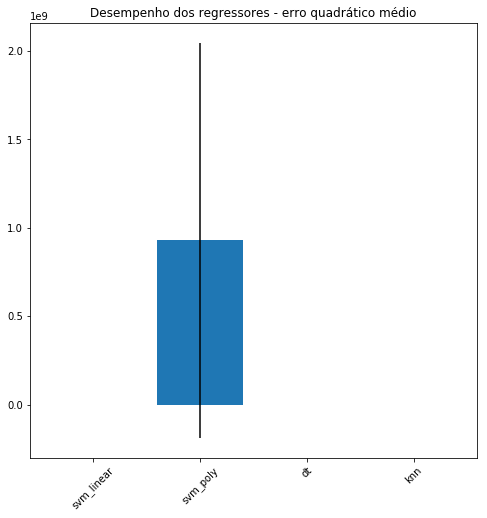

{'clfs': [SVR(C=54570, cache_size=500, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='linear', max_iter=1000000.0, shrinking=True, tol=0.001,
    verbose=False),
  SVR(C=54570, cache_size=500, coef0=1, degree=3, epsilon=0.1, gamma=1,
    kernel='poly', max_iter=1000000.0, shrinking=True, tol=0.001,
    verbose=False),
  DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=272, min_weight_fraction_leaf=0.0,
             presort=False, random_state=None, splitter='best'),
  KNeighborsRegressor(algorithm='kd_tree', leaf_size=30, metric='minkowski',
            metric_params=None, n_jobs=1, n_neighbors=5, p=2,
            weights='uniform')],
 'results': {'dt': [0.007972435620826526,
   0.009270162648475362,
   0.006361057876551668,
   0.007203695771049554,
   0.007611931303474687],
  'knn': [0.00815619675457

In [174]:
target = agro_clean1.shape[1] -1
columns = [0, 1, 2, 3]
reg_clas(agro_clean1, columns, target, regression=True)

### 5. Conclusão

O Erro (1 - acurácia) foi calculado de maneira que gerou valores com margens anormais, algo que pode ser atribuído a um número muito grande de registros com variáveis de valor zero. Devido ao uso da regressão linear como classificador só é possível observar graficamente a classificação do SVM policlasse.